In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from mle_toolbox import load_result_logs
from mle_toolbox.visualize import visualize_2D_grid
from visualize import imp_plot


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## IMP Across Brax Environments + Baselines

In [2]:
meta_log, hyper_log = load_result_logs("../experiments/blines/ant_sepcma")
hyper_log["imp_config/baseline_name"].unique()

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


array(['final-ticket', 'random-reinit', 'sig2noise'], dtype=object)

In [7]:
def get_perf_env(meta_log, hyper_log):
    """Filter dataframe for environment and popsize."""
    # print(hyper_log)
    run_id_ticket = hyper_log.filter({"imp_config/baseline_name": "final-ticket"}).run_id.iloc[0]
    run_id_random = hyper_log.filter({"imp_config/baseline_name": "random-reinit"}).run_id.iloc[0]
    run_id_sig2noi = hyper_log.filter({"imp_config/baseline_name": "sig2noise"}).run_id.iloc[0]
    ticket_perf = meta_log[run_id_ticket].stats.final_perf
    random_perf = meta_log[run_id_random].stats.final_perf
    sig2noise_perf = meta_log[run_id_sig2noi].stats.final_perf
    return {"IMP": ticket_perf, "Random": random_perf, "SNR": sig2noise_perf}

In [17]:
figsize = (20, 10)
fig, axs = plt.subplots(3, 4, figsize=figsize)
# labels = [
#     'Ant: Sep-CMA-ES', 'Pendulum: Sep-CMA-ES', 'Grasp: Sep-CMA-ES', 'MNIST: Sep-CMA-ES',
#     'Fetch: SNES', 'HalfCheetah: SNES', 'Hopper: SNES', 'F-MNIST: SNES',
#     'Reacher: PGPE', 'Walker2d: PGPE', 'ur5e: PGPE', 'K-MNIST: PGPE'
    
# ]
labels = [
    'Ant', 'Pendulum', 'Grasp', 'MNIST',
    'Fetch', 'HalfCheetah', 'Hopper', 'F-MNIST',
    'Reacher', 'Walker2d', 'ur5e', 'K-MNIST'
    
]
for i, env_strat in enumerate([
    'ant_sepcma', 'pendulum_sepcma', 'grasp_sepcma', 'mnist_sepcma',
    'fetch_snes', 'halfcheetah_snes', 'hopper_snes', 'fmnist_snes',
#    'reacher_pgpe', 'walker2d_pgpe', 'ur5e_pgpe', 'kmnist_pgpe'
    'reacher_pgpe_crv_v2', 'walker2d_pgpe_crv_v2', 'ur5e_pgpe_crv_v2', 'kmnist_pgpe_crv'
                               ]):
    meta_log, hyper_log = load_result_logs(f"../experiments/blines/{env_strat}")
    results = get_perf_env(meta_log, hyper_log)
    plot_legend = i == 7
    plot_ylabel = i in [0, 4, 8]
    plot_xlabel = i in [8, 9, 10, 11]

    imp_plot(results,
            num_imp_iters=20,
            plot_title=labels[i],
            curve_labels=list(results.keys()),
            colors=["r", "y", "black"],
            fig=fig, ax=axs.flatten()[i],
            plot_legend=False,
            plot_ylabel=plot_ylabel,
            plot_xlabel=plot_xlabel)

handles, labels = axs.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = (0.35, -0.1), ncol=3, bbox_to_anchor=(0.35, -0.05))
# fig.tight_layout()


[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]
[100.0, 32.77, 10.74, 3.52, 1.44]


In [12]:
base_dir = "../experiments/blines/"

def normalize(meta_log):
    ticket_mean = meta.b_1_eval_0.stats.final_perf["mean"][:20]
    random_mean = meta.b_1_eval_1.stats.final_perf["mean"][:20]
    s2n_mean = meta.b_1_eval_2.stats.final_perf["mean"][:20]
    
    ticket_std = meta.b_1_eval_0.stats.final_perf["std"][:20]
    random_std = meta.b_1_eval_1.stats.final_perf["std"][:20]
    s2n_std = meta.b_1_eval_2.stats.final_perf["std"][:20]

    all_val = np.stack([ticket_mean, random_mean, s2n_mean])
    min_val, max_val = np.min(all_val), np.max(all_val)
    
    def norm_0_1(arr_m, arr_s):
        return (arr_m - min_val)/(max_val - min_val), arr_s/(max_val - min_val)
    
    ticket_m, ticket_s = norm_0_1(ticket_mean, ticket_std)
    random_m, random_s = norm_0_1(random_mean, random_std)
    s2n_m, s2n_s = norm_0_1(s2n_mean, s2n_std)
    return ticket_m, ticket_s, random_m, random_s, s2n_m, s2n_s

meta, hyper = load_result_logs(base_dir + "ant_sepcma")
ticket_m, ticket_s, random_m, random_s, s2n_m, s2n_s = normalize(meta)
# ticket_m, ticket_s

In [14]:
from mle_toolbox import load_result_logs

ticket_mean, random_mean, s2n_mean = [], [], []
ticket_std, random_std, s2n_std = [], [], []

for env_strat in ['ant_sepcma', 'pendulum_sepcma', 'grasp_sepcma', 'mnist_sepcma',
                  'fetch_snes', 'halfcheetah_snes', 'hopper_snes', 'fmnist_snes',
                #   'reacher_pgpe', 'walker2d_pgpe', 'ur5e_pgpe', 'kmnist_pgpe'
                  'reacher_pgpe_crv_v2', 'walker2d_pgpe_crv_v2', 'ur5e_pgpe_crv_v2', 'kmnist_pgpe_crv'
                  ]:
    meta, hyper = load_result_logs(base_dir + env_strat)
    ticket_m, ticket_s, random_m, random_s, s2n_m, s2n_s = normalize(meta)

    ticket_mean.append(ticket_m)
    random_mean.append(random_m)
    ticket_std.append(ticket_s)
    random_std.append(random_s)
    s2n_mean.append(s2n_m)
    s2n_std.append(s2n_s)

[100.0, 32.77, 10.74, 3.52, 1.44]


(<Figure size 1950x1500 with 1 Axes>,
 <Axes: title={'center': 'Aggregated ES Ticket Effect'}, xlabel='Weights Remaining [%]', ylabel='Performance'>)

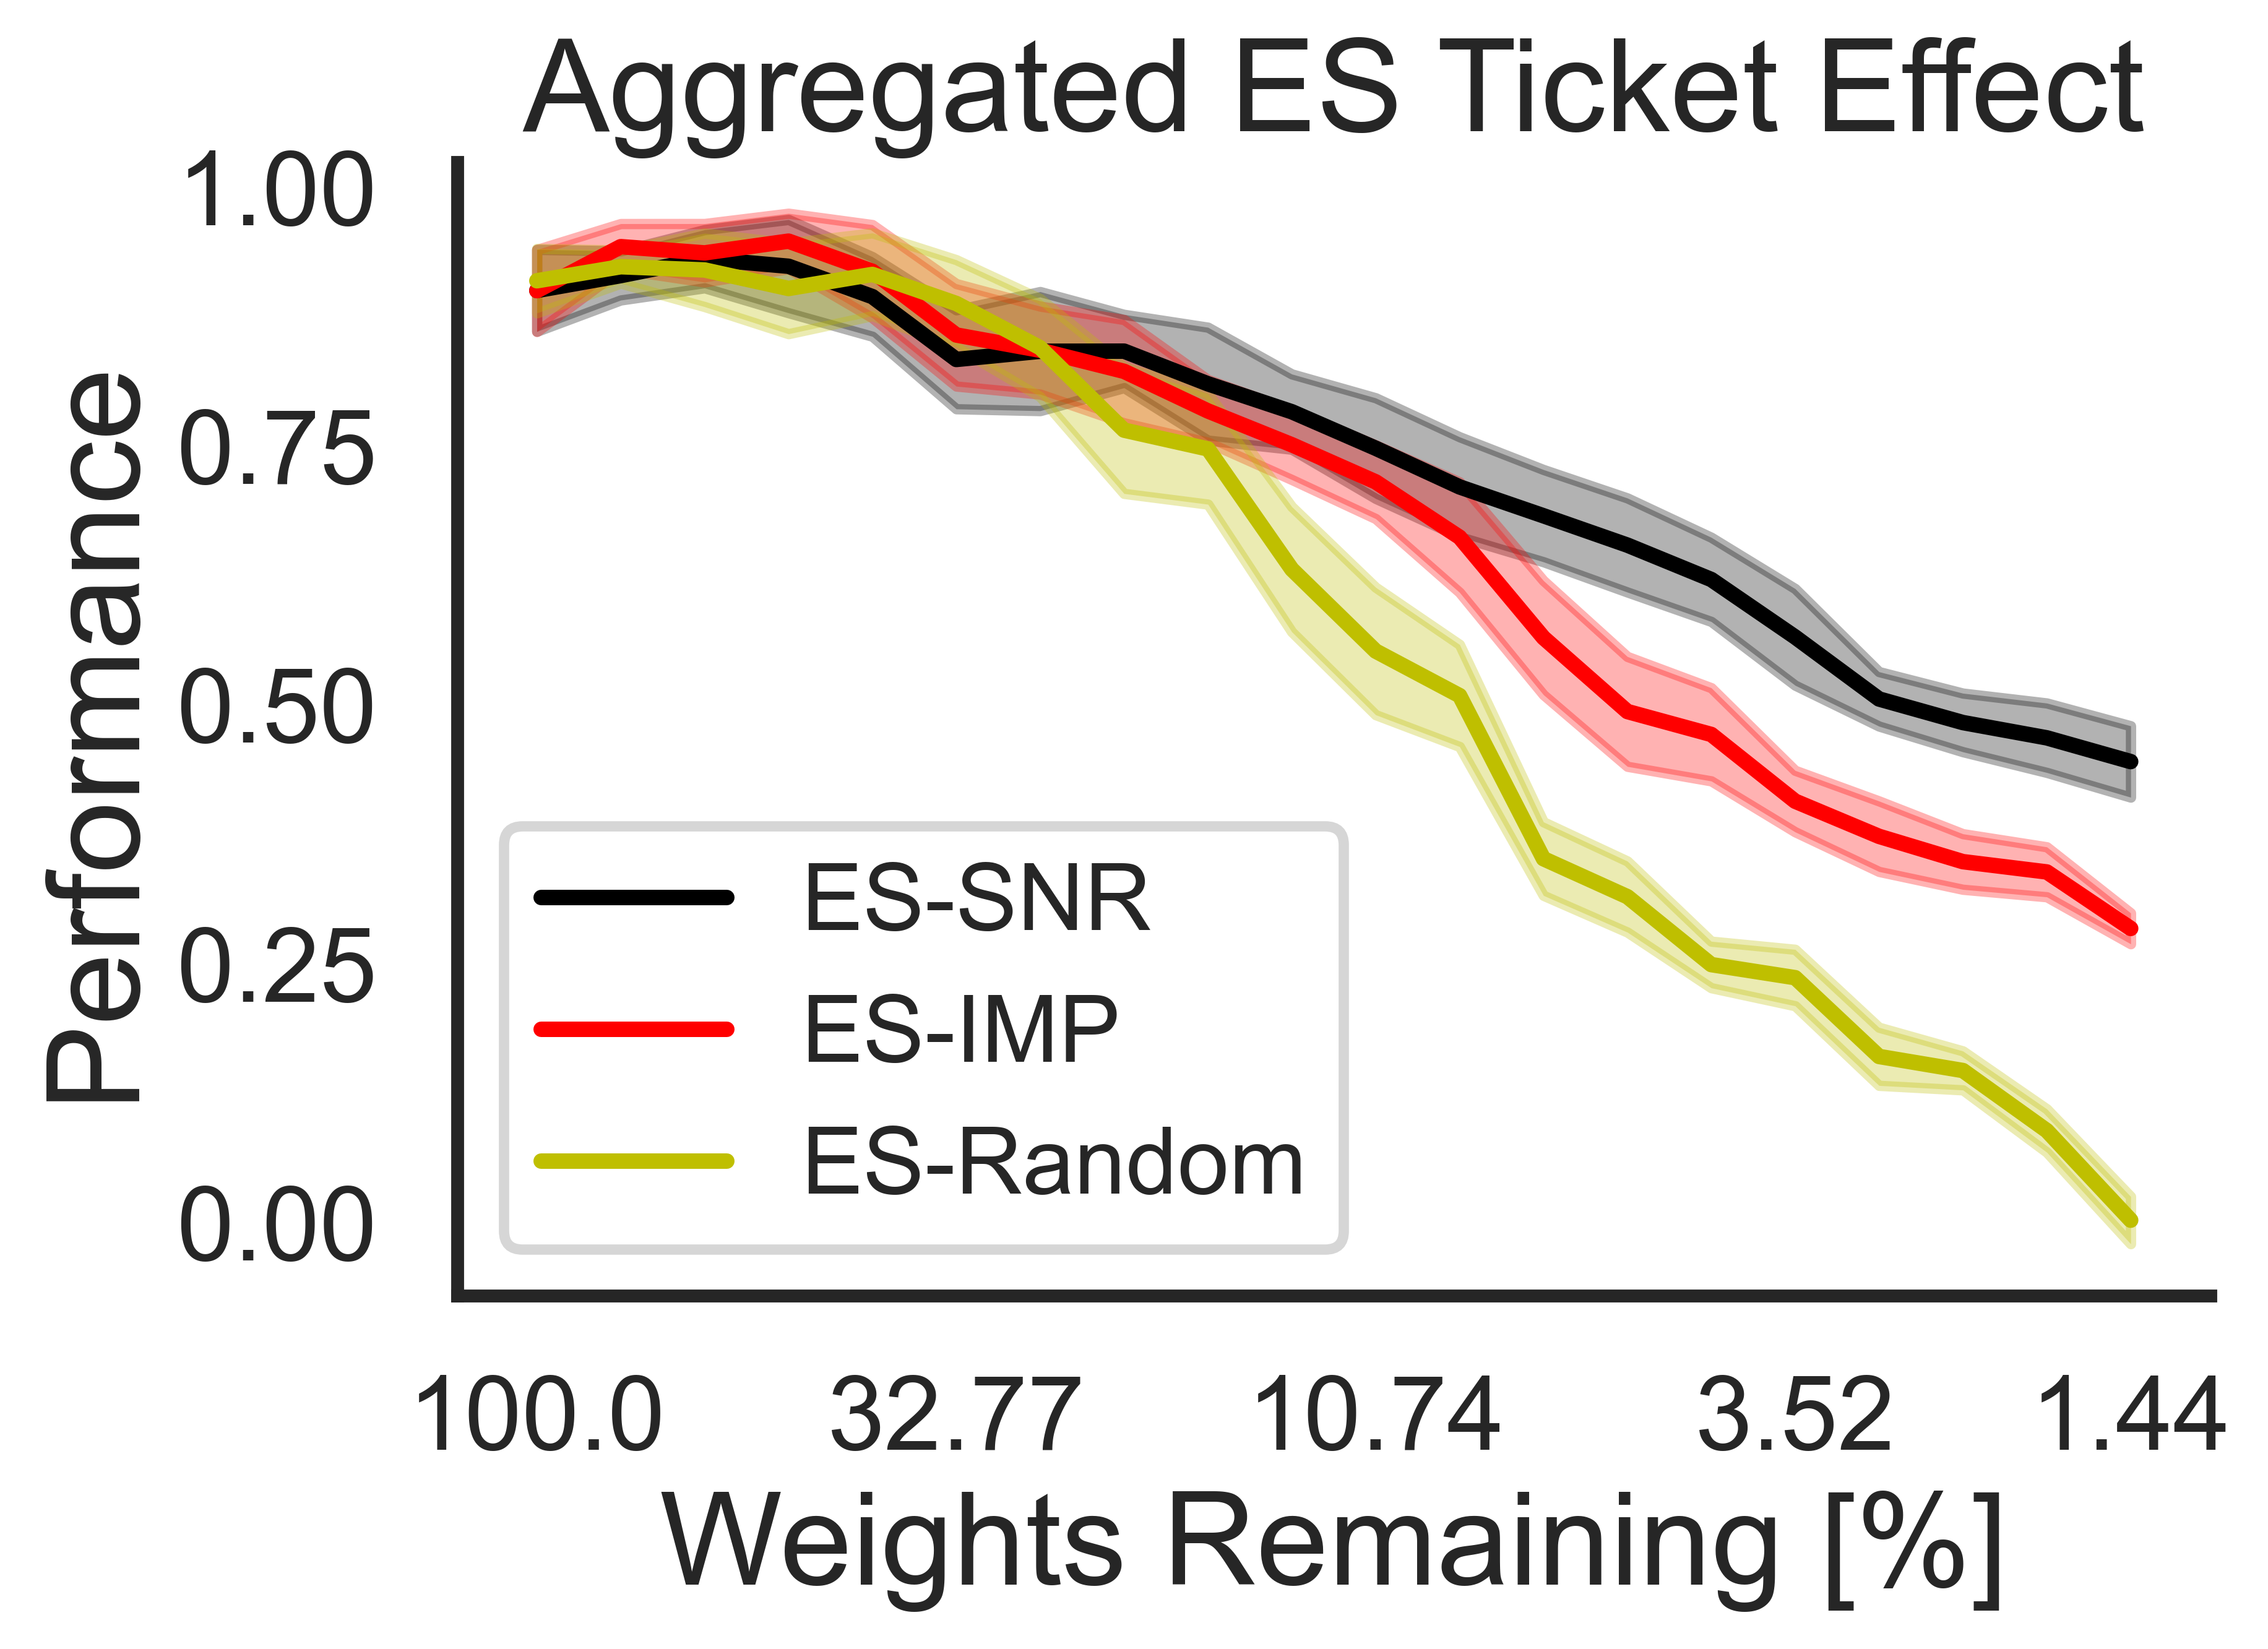

In [15]:
results = {
    "signal2noise": {
        "mean": np.mean(np.array(s2n_mean), axis=0),
        "std": np.mean(np.array(s2n_std), axis=0),
    },
    "mask/weights": {
        "mean": np.mean(np.array(ticket_mean), axis=0),
        "std": np.mean(np.array(ticket_std), axis=0),
    },
    "random/reinit": {
        "mean": np.mean(np.array(random_mean), axis=0),
        "std": np.mean(np.array(random_std), axis=0),
    },
}

fig, ax = plt.subplots(figsize=(6.5, 5))
imp_plot(results, fig, ax, num_imp_iters=20,
         curve_labels=["ES-SNR", "ES-IMP", "ES-Random"],
         colors=["black", "r", "y"],
         plot_title="Aggregated ES Ticket Effect",
         plot_legend=True, plot_xlabel=True, plot_ylabel=True)